# Stock Price Prediction
inspired/base by https://www.youtube.com/watch?v=QIUxPv5PJOY&list=WL&index=7&t=225s
I decided to Predict MS opening Stock values not only based on their own data, but also Apple and HP data, to see, if "trends" in the branche improve the results or if the not directly connected date worsens the result

# Imports

In [1]:
import math
import pandas as pd
import numpy as np

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
print("Import successful")

#if you dont like the warnings
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


Import successful


# Processing data
loading the data from yahoo

In [2]:
df=web.DataReader("MS", data_source="yahoo", start="2010-01-01", end = "2020-08-01")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,31.969999,30.629999,30.700001,30.910000,20371000.0,25.759523
2010-01-05,32.130001,30.930000,31.010000,32.040001,22523400.0,26.701244
2010-01-06,32.590000,31.790001,31.969999,32.450001,17028500.0,27.042919
2010-01-07,33.270000,32.270000,32.459999,32.919998,18693000.0,27.434603
2010-01-08,32.820000,31.980000,32.599998,32.250000,15993400.0,26.876251
...,...,...,...,...,...,...
2020-07-27,51.570000,49.730000,49.910000,51.320000,12087100.0,50.964951
2020-07-28,51.220001,50.209999,50.830002,50.259998,7287900.0,49.912281
2020-07-29,50.660000,49.880001,50.270000,50.590000,8074300.0,50.240002


In [3]:
df.rename(columns={"High":"MsHigh", "Low": "MsLow", "Open": "MsOpen", "Close": "MsClose",
                   "Volume": "MsVolume", "Adj Close":"MsAdj Close"}, inplace=True)
df

,MsHigh,MsLow,MsOpen,MsClose,MsVolume,MsAdj Close
Date,,,,,,
2010-01-04,31.969999,30.629999,30.700001,30.910000,20371000.0,25.759523
2010-01-05,32.130001,30.930000,31.010000,32.040001,22523400.0,26.701244
2010-01-06,32.590000,31.790001,31.969999,32.450001,17028500.0,27.042919
2010-01-07,33.270000,32.270000,32.459999,32.919998,18693000.0,27.434603
2010-01-08,32.820000,31.980000,32.599998,32.250000,15993400.0,26.876251
...,...,...,...,...,...,...
2020-07-27,51.570000,49.730000,49.910000,51.320000,12087100.0,50.964951
2020-07-28,51.220001,50.209999,50.830002,50.259998,7287900.0,49.912281
2020-07-29,50.660000,49.880001,50.270000,50.590000,8074300.0,50.240002


In [4]:
df2=web.DataReader("AAPL", data_source="yahoo", start="2010-01-01", end = "2020-08-01")
df2.rename(columns={"High":"AHigh", "Low": "ALow", "Open": "AOpen", "Close": "AClose",
                   "Volume": "AVolume", "Adj Close":"AAdj Close"}, inplace=True)
df2

,AHigh,ALow,AOpen,AClose,AVolume,AAdj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.419203
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.464878
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.043921
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,25.995777
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.168606
...,...,...,...,...,...,...
2020-07-27,379.619995,373.920013,374.839996,379.239990,30303500.0,378.557434
2020-07-28,378.200012,372.989990,377.470001,373.010010,25906400.0,372.338684
2020-07-29,380.920013,374.850006,375.000000,380.160004,22582300.0,379.475800


In [5]:
df3=web.DataReader("HP", data_source="yahoo", start="2010-01-01", end = "2020-08-01")
df3.rename(columns={"High":"HPHigh", "Low": "HPLow", "Open": "HPOpen", "Close": "HPClose",
                   "Volume": "HPVolume", "Adj Close":"HPAdj Close"}, inplace=True)
df3

,HPHigh,HPLow,HPOpen,HPClose,HPVolume,HPAdj Close
Date,,,,,,
2010-01-04,42.020000,40.709999,40.709999,41.980000,920000.0,28.247267
2010-01-05,44.459999,41.869999,41.990002,44.430000,3039400.0,29.895809
2010-01-06,46.090000,44.150002,44.480000,46.049999,2481200.0,30.985868
2010-01-07,46.490002,45.119999,45.880001,46.340000,1674100.0,31.180996
2010-01-08,48.580002,46.680000,46.900002,48.000000,2795600.0,32.297970
...,...,...,...,...,...,...
2020-07-27,20.590000,19.950001,20.040001,20.480000,1225200.0,20.203243
2020-07-28,20.639999,19.240000,20.379999,19.430000,1363200.0,19.167433
2020-07-29,19.889999,18.100000,19.490000,18.459999,3346400.0,18.210539


In [6]:
df = df[["MsHigh", "MsLow", "MsClose", "MsVolume", "MsAdj Close", "MsOpen"]] #reordering to make things easier
df2 = df2[["AHigh", "ALow", "AClose", "AVolume", "AAdj Close", "AOpen"]]
df3 = df3[["HPHigh", "HPLow", "HPClose", "HPVolume", "HPAdj Close", "HPOpen"]]
df

,MsHigh,MsLow,MsClose,MsVolume,MsAdj Close,MsOpen
Date,,,,,,
2010-01-04,31.969999,30.629999,30.910000,20371000.0,25.759523,30.700001
2010-01-05,32.130001,30.930000,32.040001,22523400.0,26.701244,31.010000
2010-01-06,32.590000,31.790001,32.450001,17028500.0,27.042919,31.969999
2010-01-07,33.270000,32.270000,32.919998,18693000.0,27.434603,32.459999
2010-01-08,32.820000,31.980000,32.250000,15993400.0,26.876251,32.599998
...,...,...,...,...,...,...
2020-07-27,51.570000,49.730000,51.320000,12087100.0,50.964951,49.910000
2020-07-28,51.220001,50.209999,50.259998,7287900.0,49.912281,50.830002
2020-07-29,50.660000,49.880001,50.590000,8074300.0,50.240002,50.270000


In [7]:
result = pd.concat([df3,df2, df], axis=1, sort=False)
result

,HPHigh,HPLow,HPClose,HPVolume,HPAdj Close,HPOpen,AHigh,ALow,AClose,AVolume,AAdj Close,AOpen,MsHigh,MsLow,MsClose,MsVolume,MsAdj Close,MsOpen
Date,,,,,,,,,,,,,,,,,,
2010-01-04,42.020000,40.709999,41.980000,920000.0,28.247267,40.709999,30.642857,30.340000,30.572857,123432400.0,26.419203,30.490000,31.969999,30.629999,30.910000,20371000.0,25.759523,30.700001
2010-01-05,44.459999,41.869999,44.430000,3039400.0,29.895809,41.990002,30.798571,30.464285,30.625713,150476200.0,26.464878,30.657143,32.130001,30.930000,32.040001,22523400.0,26.701244,31.010000
2010-01-06,46.090000,44.150002,46.049999,2481200.0,30.985868,44.480000,30.747143,30.107143,30.138571,138040000.0,26.043921,30.625713,32.590000,31.790001,32.450001,17028500.0,27.042919,31.969999
2010-01-07,46.490002,45.119999,46.340000,1674100.0,31.180996,45.880001,30.285715,29.864286,30.082857,119282800.0,25.995777,30.250000,33.270000,32.270000,32.919998,18693000.0,27.434603,32.459999
2010-01-08,48.580002,46.680000,48.000000,2795600.0,32.297970,46.900002,30.285715,29.865715,30.282858,111902700.0,26.168606,30.042856,32.820000,31.980000,32.250000,15993400.0,26.876251,32.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,20.590000,19.950001,20.480000,1225200.0,20.203243,20.040001,379.619995,373.920013,379.239990,30303500.0,378.557434,374.839996,51.570000,49.730000,51.320000,12087100.0,50.964951,49.910000
2020-07-28,20.639999,19.240000,19.430000,1363200.0,19.167433,20.379999,378.200012,372.989990,373.010010,25906400.0,372.338684,377.470001,51.220001,50.209999,50.259998,7287900.0,49.912281,50.830002
2020-07-29,19.889999,18.100000,18.459999,3346400.0,18.210539,19.490000,380.920013,374.850006,380.160004,22582300.0,379.475800,375.000000,50.660000,49.880001,50.590000,8074300.0,50.240002,50.270000


In [8]:
result.shape

(2663, 18)

In [9]:
result.isnull().sum()  #checking for NaN

HPHigh         0
HPLow          0
HPClose        0
HPVolume       0
HPAdj Close    0
HPOpen         0
AHigh          0
ALow           0
AClose         0
AVolume        0
AAdj Close     0
AOpen          0
MsHigh         0
MsLow          0
MsClose        0
MsVolume       0
MsAdj Close    0
MsOpen         0
dtype: int64

In [10]:
dataSet=result.values #creates numpy array
print(type(dataSet))
TrainDataLen=math.ceil(len(dataSet)*.8)

<class 'numpy.ndarray'>


In [11]:
#creating dataframe for plotting(before scaling)
plotdata=result[0:TrainDataLen]  # only plot with train(as it is the data we should know)
plotdata["nextMsOpen"]=plotdata["MsOpen"]
for i in range(1,TrainDataLen-1):#wrong for 1. and last but thats fine with me
         plotdata["nextMsOpen"][i]=plotdata["nextMsOpen"][i+1]

In [12]:
#scaling to (0,1)
scaler=MinMaxScaler(feature_range=(0,1))
scaledData=scaler.fit_transform(dataSet)

In [13]:
#splitting the data in train and test
TrainData=scaledData[0:TrainDataLen]
TestData=scaledData[TrainDataLen -60: ]
TrainData[0]

array([0.26656498, 0.27116857, 0.27661389, 0.01906447, 0.22655024,
       0.26020891, 0.00664602, 0.00840534, 0.00789011, 0.24422195,
       0.00676771, 0.00783363, 0.4128106 , 0.40557802, 0.39849624,
       0.24539034, 0.33316318, 0.39729502])

In [14]:
xTrain=[]#past x days
yTrain=[]#prediction target

for i in range(60, len(TrainData)): #give 60 days of data=> predict 61th day
    xTrain.append(TrainData[i-60:i])
    yTrain.append(TrainData[i, 17])
    
xTest=[]
yTest=[]
for i in range(60, len(TestData)): #give 60 days of data=> predict 61th day
    xTest.append(TestData[i-60:i])
    yTest.append(TrainData[i, 17])
    
xTrain, yTrain=np.array(xTrain), np.array(yTrain)    
xTest, yTest=np.array(xTest), np.array(yTest)

print("xTrain Type:",type(xTrain), "\t xTest Type:",type(xTest),
      "\tyTrain Type:",type(yTrain[0]),"\tyTest Type:",type(yTest[0]),)
print("xTrain Len:",len(xTrain[0]), "\t xTest Len:",len(xTest[0])) #=60* 6 attr

xTrain Type: <class 'numpy.ndarray'> 	 xTest Type: <class 'numpy.ndarray'> 	yTrain Type: <class 'numpy.float64'> 	yTest Type: <class 'numpy.float64'>
xTrain Len: 60 	 xTest Len: 60


In [15]:
xTrain.shape

(2071, 60, 18)

In [16]:
xTest.shape

(532, 60, 18)

# Plot

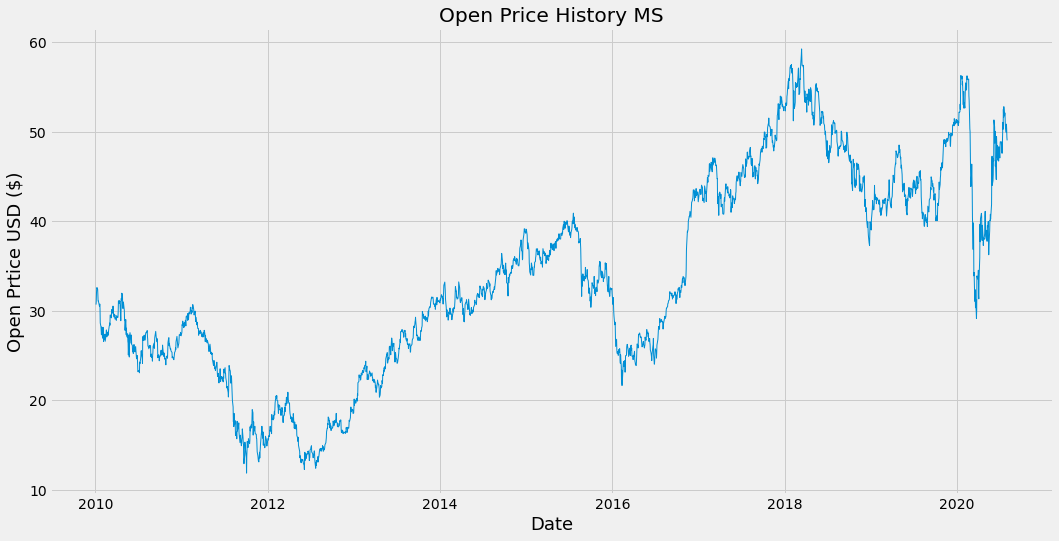

In [36]:
plt.figure(figsize=(16,8))
plt.title("Open Price History MS")
plt.plot(df["MsOpen"],linewidth=1)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Prtice USD ($)", fontsize=18)
plt.show()  #useless

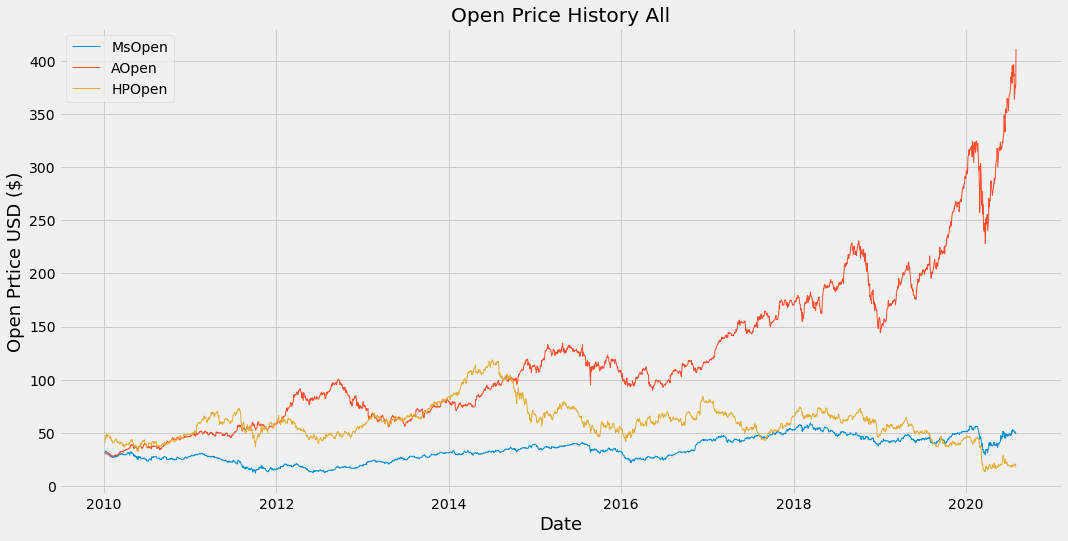

In [37]:
plt.figure(figsize=(16,8))#compare open prices
plt.title("Open Price History All")
plt.plot(result[["MsOpen","AOpen","HPOpen"]], linewidth=1)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Prtice USD ($)", fontsize=18)
plt.legend(["MsOpen","AOpen","HPOpen"], loc="upper left")

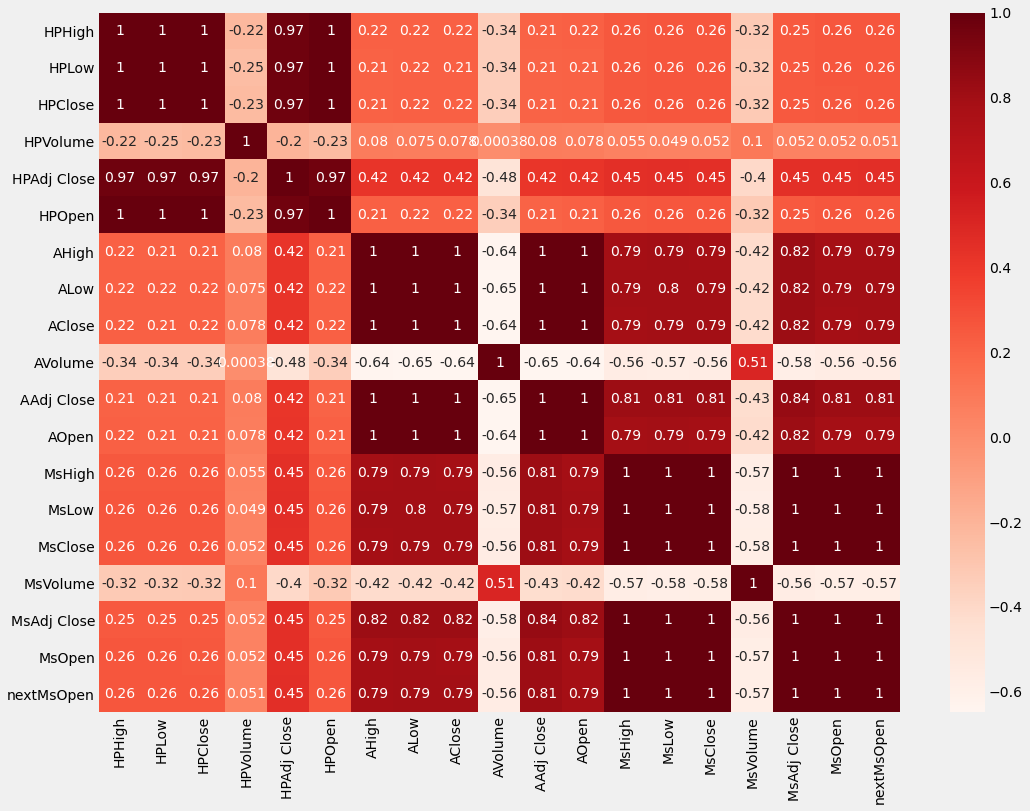

In [19]:
plt.figure(figsize=(8*2,6*2))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')
 #obviously the values correlate (but to confirm)

Apple seems to have a relatively strong correlation with ms, while HP's corr isn't as strong but still not irrelevant

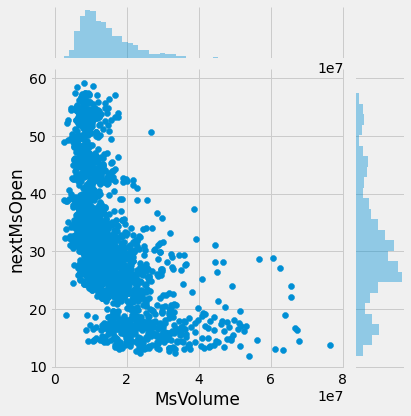

In [20]:
sns.jointplot(x="MsVolume", y="nextMsOpen", data=plotdata)

# Model

In [21]:
model=Sequential()
Neurons1=128*2
Neurons2=50*2 #more did not rly improve the results
model.add(LSTM(Neurons1,return_sequences=True, input_shape=xTrain[0].shape))# , input_shape=(xTrain.shape[1],1)
model.add(LSTM(Neurons2,return_sequences=False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="MSE")#, metrics=["MSE"]
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 256)           281600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               142800    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                2525      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 426,951
Trainable params: 426,951
Non-trainable params: 0
_________________________________________________________________


# Training

In [22]:
try:
    ccrfqwefqw
    # uncomment to train 
    model=keras.models.load_model("MS2.h5")
    print("Trainings data found")
except:
    
    print("training")
    model.fit(xTrain, yTrain, epochs=10, verbose=1, workers=4 ) #, batch_size=4
    #model.save("MS2.h5")

training
Epoch 1/10
2071/2071 [==============================] - 8s 4ms/step - loss: 0.0051
Epoch 2/10
2071/2071 [==============================] - 7s 3ms/step - loss: 6.0474e-04
Epoch 3/10
2071/2071 [==============================] - 8s 4ms/step - loss: 5.2147e-04
Epoch 4/10
2071/2071 [==============================] - 8s 4ms/step - loss: 5.2994e-04
Epoch 5/10
2071/2071 [==============================] - 7s 3ms/step - loss: 4.6813e-04
Epoch 6/10
2071/2071 [==============================] - 7s 3ms/step - loss: 4.2928e-04
Epoch 7/10
2071/2071 [==============================] - 7s 4ms/step - loss: 4.3857e-04
Epoch 8/10
2071/2071 [==============================] - 8s 4ms/step - loss: 3.6114e-04
Epoch 9/10
2071/2071 [==============================] - 7s 4ms/step - loss: 2.9836e-04
Epoch 10/10
2071/2071 [==============================] - 7s 4ms/step - loss: 3.1099e-04


# Predicitions

In [23]:
#get the real values
predictions = model.predict(xTest)

#scaled = scaler.fit(predictions)
#predictions = scaler.inverse_transform(predictions) # does not work because input != input we scaled (scaled 6 cols)
#predictions


#inserting new vals in xtest just to inversscale with the right vals to extract them
# this seems to be a very bad execution but a better one does not come to mind right now

clone=dataSet[TrainDataLen:].copy()
for i in range(len(predictions)):
    clone[i][17]=predictions[i]
    
Pred = scaler.inverse_transform(list(clone))
pred=[]
for i in range(len(predictions)):
    pred.append([Pred[i][17]])
pred=np.array(pred)
pred

array([[51.41581017],
       [51.10062302],
       [50.78062412],
       [50.28460959],
       [49.77032674],
       [49.30852761],
       [48.9837254 ],
       [48.79775345],
       [48.57824585],
       [48.41964395],
       [48.21712135],
       [48.04478647],
       [48.11956335],
       [48.33436355],
       [48.47381431],
       [48.60687384],
       [48.72975985],
       [48.92242483],
       [49.16362484],
       [49.65223275],
       [50.08496389],
       [50.42508137],
       [50.76212733],
       [51.11257345],
       [51.37447304],
       [51.59106707],
       [51.73909213],
       [51.81769924],
       [51.77897953],
       [51.67438441],
       [51.43823026],
       [51.25122319],
       [51.09462102],
       [51.03631017],
       [50.9978584 ],
       [50.8905274 ],
       [50.59712291],
       [50.15023008],
       [49.71091026],
       [49.2423363 ],
       [48.99672223],
       [48.91311721],
       [48.93464884],
       [49.02995044],
       [49.16842249],
       [49

In [24]:
model.evaluate(xTest, yTest)

532/532 [==============================] - 1s 1ms/step


0.25451618589852987

In [25]:
rsme= np.sqrt(np.mean(predictions-yTest)**2)#root mean squared error
rsme

0.48157682471906627

# Plot the data post Prediction

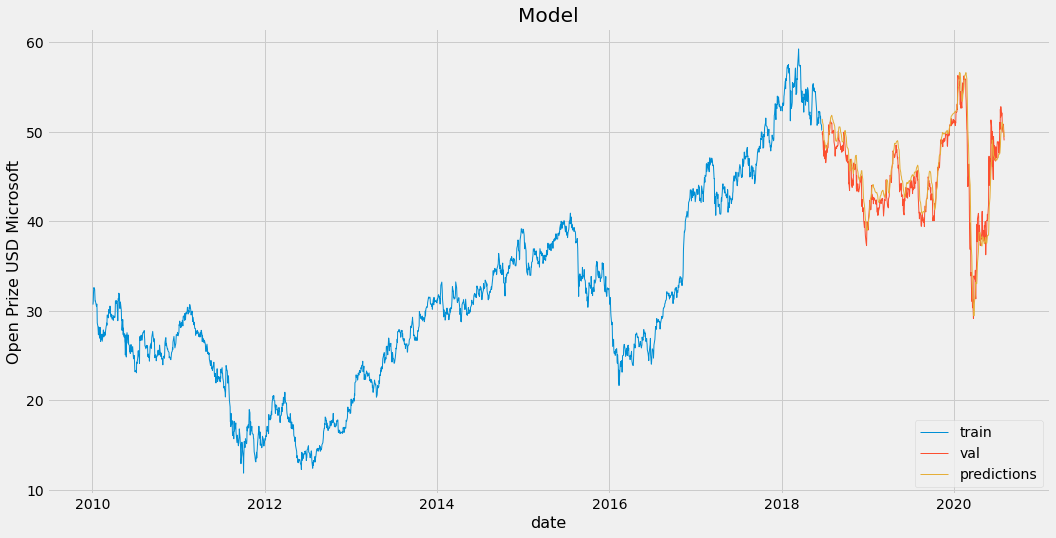

In [26]:
data=df.filter(["MsOpen"])
train=data[:TrainDataLen]
valid=data[TrainDataLen:]
valid["predictions"]=pred
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("date", fontsize=16)
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.plot(train["MsOpen"],linewidth=1)
plt.plot(valid[["MsOpen", "predictions"]],linewidth=1)
plt.legend(["train", "val", "predictions"], loc="lower right")
plt.show()

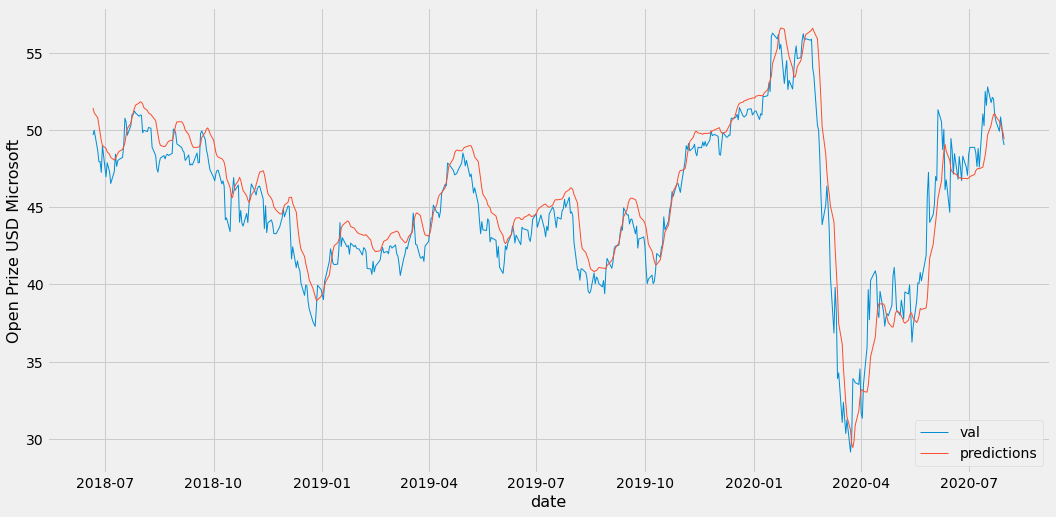

In [27]:
#zoomed in on new data
plt.figure(figsize=(16,8))
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.xlabel("date", fontsize=16)
plt.plot(valid[["MsOpen", "predictions"]],linewidth=1)
plt.legend([ "val", "predictions"], loc="lower right")
plt.show()

In [28]:
valid["dif(%)"]=((valid["MsOpen"]-valid["predictions"])/valid["MsOpen"])*100
valid["difABS(%)"]=abs(valid["dif(%)"])
valid

,MsOpen,predictions,dif(%),difABS(%)
Date,,,,
2018-06-21,49.660000,51.415810,-3.535663,3.535663
2018-06-22,49.980000,51.100623,-2.242144,2.242144
2018-06-25,48.650002,50.780624,-4.379491,4.379491
2018-06-26,47.939999,50.284610,-4.890720,4.890720
2018-06-27,47.939999,49.770327,-3.817956,3.817956
...,...,...,...,...
2020-07-27,49.910000,50.549677,-1.281660,1.281660
2020-07-28,50.830002,50.314025,1.015104,1.015104
2020-07-29,50.270000,50.085539,0.366941,0.366941


In [29]:
valid.describe()

,MsOpen,predictions,dif(%),difABS(%)
count,532.000000,532.000000,532.000000,532.000000
mean,45.062011,45.731242,-1.541209,3.110789
std,4.813484,4.918358,3.892824,2.799758
min,29.150000,29.448010,-19.522119,0.000363
25%,41.980000,43.084337,-3.576637,1.135140
50%,44.650002,45.630606,-1.711263,2.435415
75%,48.500000,49.210329,0.132518,4.282721
max,56.259998,56.592014,15.586307,19.522119


filtering pre Covid-19 lockdown data

In [40]:
preCovid=valid["2018-06-21":"2020-02-1"] #the date is a point before the big decline
preCovid.describe()

,MsOpen,predictions,dif(%),difABS(%)
count,406.000000,406.000000,406.000000,406.000000
mean,45.389877,44.904670,1.012360,2.050942
std,3.737247,3.526417,2.365226,1.550788
min,37.279999,37.574833,-7.425100,0.005320
25%,42.452500,42.144758,-0.368349,0.802665
50%,44.600000,44.137088,1.149510,1.721143
75%,48.340000,47.690398,2.537523,2.873616
max,56.259998,54.767999,7.873786,7.873786


# Feedback/Notes version 1 (see Github vers)
With the same Model parameters with which we predicted with only Ms Data, the Max error declined with the additional data, but the Mean increased a tiny bit (for comparison look at the oter doc)<br>
with more neurons, the mean improves, but the max worsens. <br>
it is not sure, if I should use all data from the other Stocks or if just 1 would do the trick(but I dont see it  hurting the pervormance, just the time)<br><br>
Something is wrong, every time i rerun the Model, the results get worse